In [1]:
import pymysql
import pandas as pd

In [2]:
# MySQL Parameters
DB_HOST = 'localhost'
DB_USER = 'root'
DB_PASS = ''
DB_NAME = 'hmda'

# Files location
folder = "D:/data/HMDA/"

In [3]:
def getDBData(sql):
    df = pd.DataFrame()
    
    connection = pymysql.connect(host=DB_HOST,
                                 user=DB_USER,
                                 password=DB_PASS,
                                 db=DB_NAME,
                                 charset='utf8mb4',
                                 cursorclass=pymysql.cursors.DictCursor)


    df = pd.read_sql(sql, connection)
    return df

In [4]:
getDBData("SELECT DISTINCT ASOF_DATE from hmda.lars")

,ASOF_DATE
0,1990
1,1991
2,1992
3,1993
4,1994
5,1995
6,1996
7,1997
8,1998
9,1999


In [5]:
applicationcountsdf = getDBData("select count(*), l.STATE_CODE, l.COUNTY_CODE, ASOF_DATE from hmda.lars l \
            GROUP BY l.STATE_CODE, l.COUNTY_CODE, ASOF_DATE")

In [6]:
applicationcountsdf

,count(*),STATE_CODE,COUNTY_CODE,ASOF_DATE
0,3627,,,1990
1,378,,,1991
2,387,,,1992
3,16,,,1993
4,970,,,1994
5,2,,,1995
6,1,,,2000
7,423,,,2001
8,140,,,2002
9,1,,24,1992


In [8]:
applicationcountsdf.to_csv('applicationcounts.csv', index=False)

# First analysis

In [10]:
import pandas as pd
df = pd.read_csv('applicationcounts.csv')
df

,count(*),STATE_CODE,COUNTY_CODE,ASOF_DATE
0,3627,,,1990
1,378,,,1991
2,387,,,1992
3,16,,,1993
4,970,,,1994
5,2,,,1995
6,1,,,2000
7,423,,,2001
8,140,,,2002
9,1,,24,1992


In [12]:
df.sort_values('count(*)')

,count(*),STATE_CODE,COUNTY_CODE,ASOF_DATE
35563,1,24,163,1993
30434,1,20,008,1992
30494,1,20,016,1991
30524,1,20,020,1990
30539,1,20,022,1992
30683,1,20,043,1991
30696,1,20,044,1993
30697,1,20,044,1994
30726,1,20,048,1994
30727,1,20,049,1990


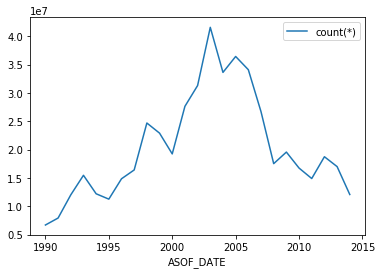

In [17]:
%matplotlib inline
df.groupby('ASOF_DATE').sum().plot()

In [18]:
df.groupby('ASOF_DATE').sum()

,count(*)
ASOF_DATE,
1990,6707650
1991,7940024
1992,12026809
1993,15477323
1994,12215807
1995,11271664
1996,14865058
1997,16421046
1998,24701216
